# Numpy Warmup

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential, Model
from keras.layers import *
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.preprocessing.image import *
import keras.backend as K

In [9]:
arr = np.arange(1, 10)
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
arr = arr.reshape(3,3)
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [11]:
arr = np.average(arr, axis=0)
arr

array([4., 5., 6.])

# 20.1.1)
Ein RGB-Bild würde eine Shape von (28, 28, 3) für jeden der drei Farbkanäle benötigen.

# 20.1.2)

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
model = Sequential()
model.add(Conv2D(10, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
model.output_shape

(None, 10)

In [14]:
train_images = x_train.reshape((60000, 28, 28, 1))
train_labels = to_categorical(y_train)
test_images = x_test.reshape((10000, 28, 28, 1))
test_labels = to_categorical(y_test)

In [15]:
model.fit(train_images, train_labels, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 4s 68ms/step - loss: 6.4145 - accuracy: 0.7796
Epoch 2/10
60/60 [==============================] - 4s 68ms/step - loss: 0.7311 - accuracy: 0.9309
Epoch 3/10
60/60 [==============================] - 4s 68ms/step - loss: 0.2912 - accuracy: 0.9584
Epoch 4/10
60/60 [==============================] - 4s 67ms/step - loss: 0.1417 - accuracy: 0.9723
Epoch 5/10
60/60 [==============================] - 4s 67ms/step - loss: 0.0740 - accuracy: 0.9824
Epoch 6/10
60/60 [==============================] - 4s 67ms/step - loss: 0.0440 - accuracy: 0.9881
Epoch 7/10
60/60 [==============================] - 4s 66ms/step - loss: 0.0314 - accuracy: 0.9909
Epoch 8/10
60/60 [==============================] - 4s 66ms/step - loss: 0.0228 - accuracy: 0.9934
Epoch 9/10
60/60 [==============================] - 4s 66ms/step - loss: 0.0155 - accuracy: 0.9953
Epoch 10/10
60/60 [==============================] - 4s 66ms/step - loss: 0.0115 - accuracy: 0.9958


In [16]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2206 - accuracy: 0.9697


[0.22058908641338348, 0.9696999788284302]

# 20.1.3)

Flatten wird benötigt um ein multidimensionales Array (z.B. Ergebnis vom Convolution-Layer) in ein eindimensionales umzuformen.

# 20.1.4)

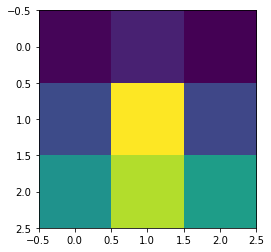

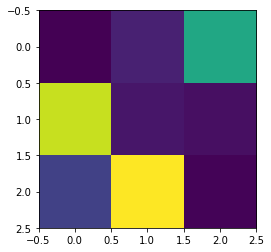

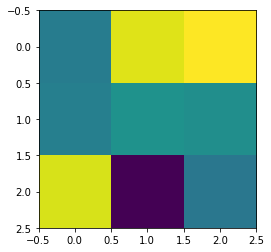

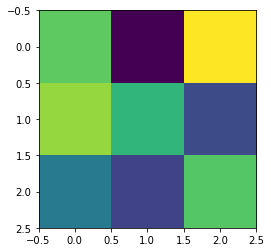

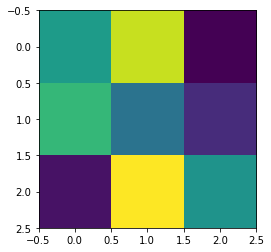

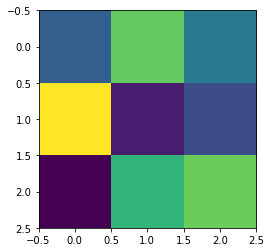

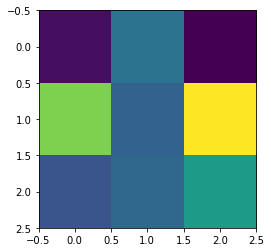

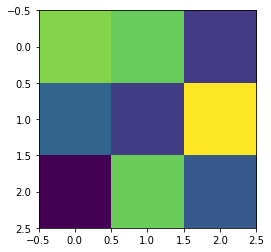

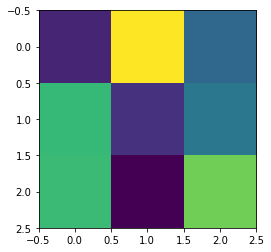

In [17]:
data = K.eval(model.layers[0].weights[0])
for x in range(9):
    plt.imshow(data[:,:,:,x].reshape(3,3))
    plt.show()